**MODEL1 : LOGISTIC REGRESSION**

STEP1: IMPORTING LIBRARIES

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


STEP2: LOAD AND EXPLORE DATASET


In [2]:
url = "https://raw.githubusercontent.com/Oscar4561/Social_Network_Ads.csv/refs/heads/main/Social_Network_Ads.csv"


df = pd.read_csv(url)

#Display top 5 rows of dataset
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


STEP3: DATA CLEANING AND PREPARATION


In [3]:
#1. Dropping user ID as it is just an identifier
df.drop('User ID',axis=1,inplace=True) #axis=1 for columns
#inplace=True: directly change in the dataset

#2. Encoding Categorical values
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender']) #0:female, 1: Male

#3. Features 'X'
X=df.drop('Purchased',axis=1)

#4. Target variable 'y'
y=df['Purchased']

#5. Splitting the dataset :80/20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


STEP4 : TRAINING THE LOGISTIC REGRESSION MODEL

In [4]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Display parameters
print("Model trained successfully!")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model trained successfully!
Coefficients: [[2.84619221e-01 2.10719873e-01 3.58422448e-05]]
Intercept: [-11.69199787]


STEP5: MAKING PREDICTIONS AND COMPARE RESULTS

In [5]:
#predicting on test set
y_pred=model.predict(X_test)

# Create a result DataFrame
results = pd.DataFrame({
    'Gender': X_test['Gender'],
    'Age': X_test['Age'],
    'Salary': X_test['EstimatedSalary'],
    'Actual': y_test,
    'Predicted': y_pred
})

print(results.head())

     Gender  Age  Salary  Actual  Predicted
209       0   46   22000       0          0
280       0   59   88000       1          1
33        0   28   44000       0          0
210       0   48   96000       1          1
93        0   29   28000       0          0


STEP6: MODEL EVALUATION


In [6]:
#1. Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: { round(accuracy * 100, 2)}%")

#2. Confusion Matrix [[TN FP],[FN TP]]
conmat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conmat)

#3. Classification Report
classrep=classification_report(y_test,y_pred)
print("Classification Report:")
print(classrep)


Accuracy: 88.75%
Confusion Matrix:
[[50  2]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



VISUALIZING CONFUSION MATRIX

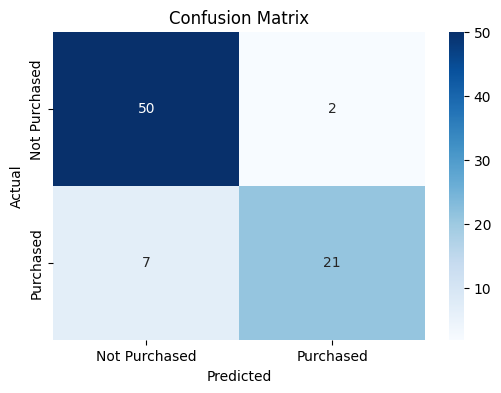

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(conmat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**MODEL 2: DECISION TREE**

STEP1 : IMPORTING THE CLASSIFIER

In [8]:
from sklearn.tree import DecisionTreeClassifier

STEP2 : CREATING A MODEL

In [9]:
dt_model=DecisionTreeClassifier(max_depth=5,random_state=0)


STEP3 : FITTING THE MODEL

In [10]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

STEP4 : MAKING PREDICTIONS

In [11]:
y_pred_dt=dt_model.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0]


STEP5: EVALUATE THE MODEL

In [12]:
print(f"Accuracy:\n {round(accuracy_score(y_pred,y_test)*100,2)}%")

print(f"Confusion Matrix:\n {confusion_matrix(y_pred,y_test)}")

print(f"Classification Report:\n {classification_report(y_pred,y_test)}")

Accuracy:
 88.75%
Confusion Matrix:
 [[50  7]
 [ 2 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92        57
           1       0.75      0.91      0.82        23

    accuracy                           0.89        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.90      0.89      0.89        80



VISUALIZATION OF DECISION TREE

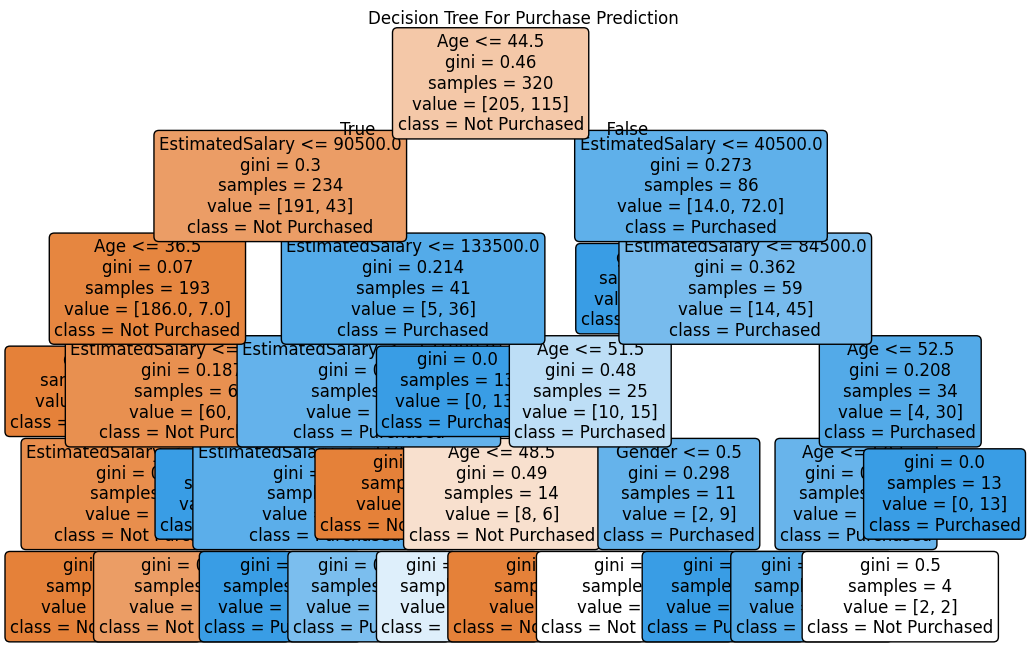

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Not Purchased','Purchased'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree For Purchase Prediction")
plt.show()

**MODEL 3: RANDOM FOREST**

STEP1: IMPORTING AND CREATING A MODEL

In [19]:
from sklearn.ensemble import RandomForestClassifier


#Model Creation
model_rf=RandomForestClassifier(n_estimators=100,random_state=0)
model_rf.fit(X_train,y_train)
print(model_rf)

RandomForestClassifier(random_state=0)


STEP2: PREDICTION

In [20]:
y_pred_fr=model_rf.predict(X_test)
print(y_pred_fr)

[1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]


STEP3: EVALUATION

In [21]:
accuracy=accuracy_score(y_pred_fr,y_test)
print(f"Accuracy: {round(accuracy*100,2)}%")

print(f"Confusion Matrix:\n {confusion_matrix(y_pred_fr,y_test)}")

print(f"Classification Report:\n {classification_report(y_pred_fr,y_test)}")

Accuracy: 91.25%
Confusion Matrix:
 [[48  3]
 [ 4 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        51
           1       0.89      0.86      0.88        29

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



VISUALIZATION

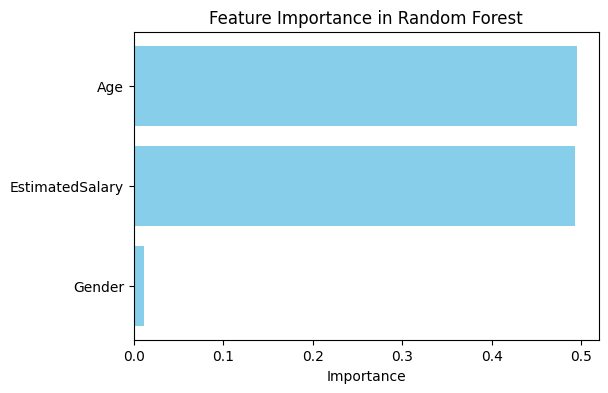

In [26]:
# Get feature importances from the trained model
importances = model_rf.feature_importances_

# Feature names (same order as in X_train)
feature_names = X_train.columns

# Create a DataFrame for easy plotting
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(6,4))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')

plt.show()


We can se that the random forest model cared the most about the features: "Age" and "Estimated Salary"

**COMPARISON BETWEEN THREE MODELS**

In [27]:
acc_logistic = 88.75
acc_tree = 88.75
acc_rf = 91.25


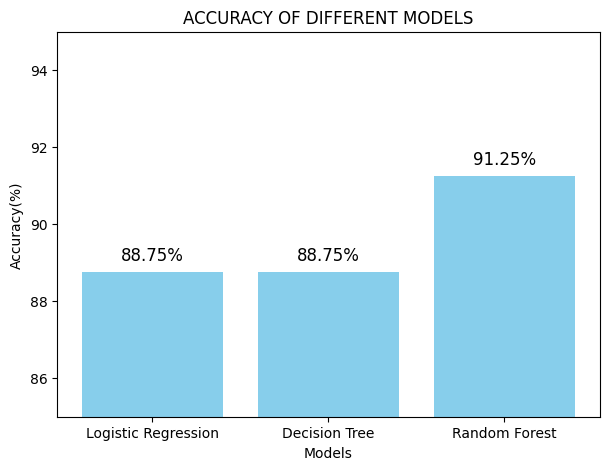

In [34]:
models=['Logistic Regression','Decision Tree','Random Forest']
accuracy=[acc_logistic,acc_tree,acc_rf]

#plotting
plt.figure(figsize=(7,5))
plt.bar(models,accuracy,color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy(%)")
plt.ylim(85,95)
for i,acc in enumerate(accuracy):
  plt.text(i,acc+0.3,f"{acc}%",ha='center',fontsize=12)
plt.title("ACCURACY OF DIFFERENT MODELS")
plt.show()